<a href="https://colab.research.google.com/github/MaxiAragon/Actividad1/blob/main/Actividad_1_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 1**
##**Maximiliano Aragón Fragoso**
##**A01702063**

1. Crear un nuevo repositorio nuevo con el nombre: Actividad 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Agregar el archivo: Listing.csv.gz de México ingresar a: http://insideairbnb.com/get-the-data/

In [2]:
df = pd.read_csv('listings_amsterdam.csv.gz')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16


In [3]:
# Filtrar por columnas
df1 = df.loc[:, ['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'room_type']]
df1.head()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,305,100%,$49.00,14,4.89,5.00,4.98,Private room
1,339,98%,$106.00,0,4.44,4.79,4.62,Private room
2,231,100%,$136.00,121,4.94,4.95,4.92,Private room
3,428,100%,$75.00,117,4.88,4.89,4.94,Private room
4,582,100%,$55.00,160,4.79,4.84,4.92,Private room


In [4]:
df1["host_acceptance_rate"] = df1["host_acceptance_rate"].str.replace("%","")
df1["price"] = df1["price"].str.replace("$","")
df1["price"] = df1["price"].str.replace(",","")
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,305,100,49.00,14,4.89,5.00,4.98,Private room
1,339,98,106.00,0,4.44,4.79,4.62,Private room
2,231,100,136.00,121,4.94,4.95,4.92,Private room
3,428,100,75.00,117,4.88,4.89,4.94,Private room
4,582,100,55.00,160,4.79,4.84,4.92,Private room


3. Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            6893 non-null   int64  
 1   host_acceptance_rate         6031 non-null   object 
 2   price                        6893 non-null   object 
 3   availability_365             6893 non-null   int64  
 4   review_scores_rating         6247 non-null   float64
 5   review_scores_cleanliness    6242 non-null   float64
 6   review_scores_communication  6242 non-null   float64
 7   room_type                    6893 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 430.9+ KB


In [6]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype('float64')
df1['price'] = df1['price'].astype('float64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            6893 non-null   int64  
 1   host_acceptance_rate         6031 non-null   float64
 2   price                        6893 non-null   float64
 3   availability_365             6893 non-null   int64  
 4   review_scores_rating         6247 non-null   float64
 5   review_scores_cleanliness    6242 non-null   float64
 6   review_scores_communication  6242 non-null   float64
 7   room_type                    6893 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 430.9+ KB


In [7]:
df1['review_scores_rating'].fillna(df1['review_scores_rating'].mean(), inplace = True)
df1['review_scores_cleanliness'].fillna(df1['review_scores_cleanliness'].mean(), inplace = True)
df1['host_acceptance_rate'].fillna(df1['host_acceptance_rate'].mean(), inplace = True)
df1['review_scores_communication'].fillna(df1['review_scores_communication'].mean(), inplace = True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            6893 non-null   int64  
 1   host_acceptance_rate         6893 non-null   float64
 2   price                        6893 non-null   float64
 3   availability_365             6893 non-null   int64  
 4   review_scores_rating         6893 non-null   float64
 5   review_scores_cleanliness    6893 non-null   float64
 6   review_scores_communication  6893 non-null   float64
 7   room_type                    6893 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 430.9+ KB


In [9]:
y = df1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_reviews              109.00
host_acceptance_rate           143.50
price                          472.50
availability_365               380.00
review_scores_rating             5.36
review_scores_cleanliness        5.42
review_scores_communication      5.18
dtype: float64
Limite inferior permitido number_of_reviews              -59.00
host_acceptance_rate            27.50
price                          -83.50
availability_365              -228.00
review_scores_rating             4.40
review_scores_cleanliness        4.22
review_scores_communication      4.70
dtype: float64


In [10]:
df2 = df1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,NaN,100.0,49.0,14,4.89,5.00,4.98,NaN
1,NaN,98.0,106.0,0,4.44,4.79,NaN,NaN
2,NaN,100.0,136.0,121,4.94,4.95,4.92,NaN
3,NaN,100.0,75.0,117,4.88,4.89,4.94,NaN
4,NaN,100.0,55.0,160,4.79,4.84,4.92,NaN
...,...,...,...,...,...,...,...,...
6888,28.0,100.0,300.0,0,4.73,4.69,NaN,NaN
6889,18.0,50.0,195.0,0,5.00,4.94,5.00,NaN
6890,21.0,100.0,449.0,0,4.90,4.90,4.71,NaN
6891,8.0,NaN,282.0,0,5.00,5.00,5.00,NaN


In [11]:
df3 = df2.copy()
df3 = df3.fillna(round(df2.mean(),1))
df3

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,20.7,100.0,49.0,14,4.89,5.00,4.98,NaN
1,20.7,98.0,106.0,0,4.44,4.79,4.90,NaN
2,20.7,100.0,136.0,121,4.94,4.95,4.92,NaN
3,20.7,100.0,75.0,117,4.88,4.89,4.94,NaN
4,20.7,100.0,55.0,160,4.79,4.84,4.92,NaN
...,...,...,...,...,...,...,...,...
6888,28.0,100.0,300.0,0,4.73,4.69,4.90,NaN
6889,18.0,50.0,195.0,0,5.00,4.94,5.00,NaN
6890,21.0,100.0,449.0,0,4.90,4.90,4.71,NaN
6891,8.0,84.4,282.0,0,5.00,5.00,5.00,NaN


In [12]:
df3['room_type'] = df1['room_type']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            6893 non-null   float64
 1   host_acceptance_rate         6893 non-null   float64
 2   price                        6893 non-null   float64
 3   availability_365             6893 non-null   int64  
 4   review_scores_rating         6893 non-null   float64
 5   review_scores_cleanliness    6893 non-null   float64
 6   review_scores_communication  6893 non-null   float64
 7   room_type                    6893 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 430.9+ KB


In [13]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [14]:
entire_home = df3[df3['room_type'] == 'Entire home/apt']
private_room = df3[df3['room_type'] == 'Private room']
hotel_room = df3[df3['room_type'] == 'Hotel room']
shared_room = df3[df3['room_type'] == 'Shared room']

4. Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

###**Correlaciones para "entire home"**

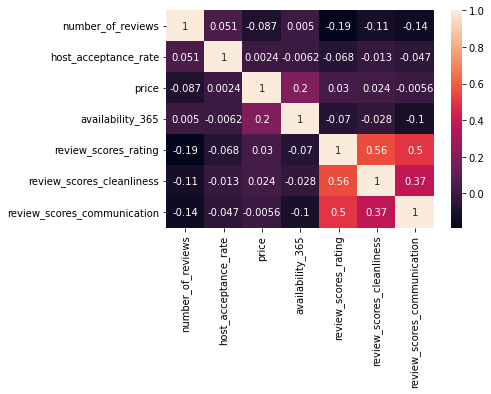

In [15]:
from sklearn.linear_model import LinearRegression
sns.heatmap(entire_home.corr(), annot = True)

In [22]:
Vars_Indep_entire = entire_home[['review_scores_rating', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep_entire = entire_home['number_of_reviews']

In [23]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X=Vars_Indep_entire, y=Var_Dep_entire)
model1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-23.12140174,  -0.65519478, -19.1155566 ]),
 '_residues': 1952144.3053901438,
 'rank_': 3,
 'singular_': array([14.1373635 ,  7.05588926,  4.07574381]),
 'intercept_': 227.5209638334957}

In [24]:
model1.score(Vars_Indep_entire, Var_Dep_entire)

0.03836226664173947

###**Correlaciones para "private room"**

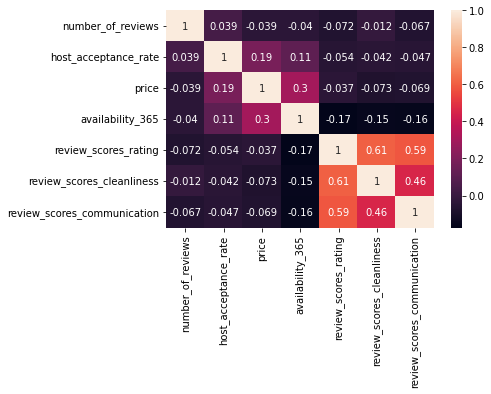

In [19]:
sns.heatmap(private_room.corr(), annot = True)

In [26]:
Vars_Indep_private = private_room[['availability_365', 'review_scores_rating','review_scores_communication']]
Var_Dep_private = private_room['number_of_reviews']

In [27]:
model2 = LinearRegression()
model2.fit(X = Vars_Indep_private, y = Var_Dep_private)
model2.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'review_scores_rating',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.16070021e-02, -1.00236362e+01, -1.47707149e+01]),
 '_residues': 1221314.984072933,
 'rank_': 3,
 'singular_': array([5.45220653e+03, 6.53816089e+00, 2.43316017e+00]),
 'intercept_': 151.62134328059255}

In [28]:
model2.score(Vars_Indep_private, Var_Dep_private)

0.009213764369379596

###**Correlaciones para "hotel room"**

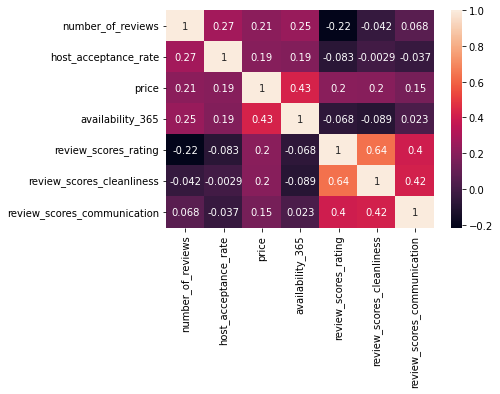

In [29]:
sns.heatmap(hotel_room.corr(), annot = True)

In [30]:
Vars_Indep_hotel = hotel_room[['host_acceptance_rate', 'price','availability_365']]
Var_Dep_hotel = hotel_room['number_of_reviews']

In [31]:
model3 = LinearRegression()
model3.fit(X = Vars_Indep_hotel, y = Var_Dep_hotel)
model3.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'price', 'availability_365'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.77224238, 0.02504588, 0.03503762]),
 '_residues': 48340.16320392225,
 'rank_': 3,
 'singular_': array([1207.12635282,  728.66871148,   66.50894216]),
 'intercept_': -53.487978924544564}

In [36]:
model3.score(Vars_Indep_hotel, Var_Dep_hotel)

0.12144897616687789

###**Correlaciones para "shared room"**

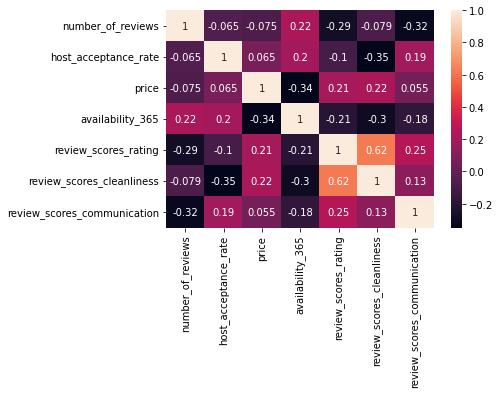

In [33]:
sns.heatmap(shared_room.corr(), annot = True)

In [34]:
Vars_Indep_shared = shared_room[['availability_365', 'review_scores_rating','review_scores_communication']]
Var_Dep_shared = shared_room['number_of_reviews']

In [35]:
model4 = LinearRegression()
model4.fit(X = Vars_Indep_shared, y = Var_Dep_shared)
model4.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'review_scores_rating',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 2.33424921e-02, -3.22814395e+01, -8.92452700e+01]),
 '_residues': 23399.889223837483,
 'rank_': 3,
 'singular_': array([9.71311121e+02, 9.99186584e-01, 4.38868163e-01]),
 'intercept_': 617.0529033226333}

In [37]:
model4.score(Vars_Indep_shared, Var_Dep_shared)

0.16419571520367393

5. Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con con mayor correlación.

Para entire home, utilizamos la variable *review_scores_rating, review_scores_cleanliness, review_scores_communication, *

$y = -23.12x_1 - 0.65x_2 - 19.11x_3 + 227.52 $

Para private room, utilizamos la variable *availability_365, review_scores_rating, review_scores_communication*

$y = -0.0116x_1 - 10.02x_2 - 14.77x_3 + 151.62$

Para hotel room, utilizamos la variable *host_acceptance_rate, price, availability_365*

$y = 0.772x_1 + 0.025x_2 + 0.035x_3 - 53.488$

Para shared room, utilizamos la variable *availability_365, review_scores_rating, review_scores_communication*

$y = 0.0233x_1 - 32.281x_2 - 89.24x_3 + 617.053$

6. Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación.

In [38]:
df5 = pd.DataFrame(columns = ['Room Type', 'Coef Deter', 'Coef Corr'])
df5['Room Type'] = df['room_type'].unique()
model_entire = LinearRegression()
model_entire.fit(X = entire_home[['host_acceptance_rate']], y = entire_home['number_of_reviews'])
deter_entire = model_entire.score(X = entire_home[['host_acceptance_rate']], y = entire_home['number_of_reviews'])
corr_entire = np.sqrt(deter_entire)

model_private = LinearRegression()
model_private.fit(X = private_room[['host_acceptance_rate']], y = private_room['number_of_reviews'])
deter_private = model_private.score(X = private_room[['host_acceptance_rate']], y = private_room['number_of_reviews'])
corr_private = np.sqrt(deter_private)
                      
model_hotel = LinearRegression()
model_hotel.fit(X = hotel_room[['review_scores_communication']], y = hotel_room['number_of_reviews'])
deter_hotel = model_hotel.score(X = hotel_room[['review_scores_communication']], y = hotel_room['number_of_reviews'])
corr_hotel = np.sqrt(deter_hotel)

model_shared = LinearRegression()
model_shared.fit(X = shared_room[['host_acceptance_rate']], y = shared_room['number_of_reviews'])
deter_shared = model_shared.score(X = shared_room[['host_acceptance_rate']], y = shared_room['number_of_reviews'])
corr_shared = np.sqrt(deter_shared)

df5['Coef Deter'] = [deter_entire, deter_private, deter_hotel, deter_shared]
df5['Coef Corr'] = [corr_entire, corr_private, corr_hotel, corr_shared]

df5

,Room Type,Coef Deter,Coef Corr
0,Private room,0.002603,0.051024
1,Entire home/apt,0.001526,0.039064
2,Hotel room,0.004568,0.067584
3,Shared room,0.004193,0.064755
